In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
plt.rcParams['figure.figsize']=10,12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_India=pd.read_csv(r'covid_19_India.csv')
India_coord=pd.read_excel(r'Indian Coordinates.xlsx')

In [3]:
print(df_India.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2450 non-null   int64 
 1   Date                      2450 non-null   object
 2   Time                      2450 non-null   object
 3   State/UnionTerritory      2450 non-null   object
 4   ConfirmedIndianNational   2450 non-null   object
 5   ConfirmedForeignNational  2450 non-null   object
 6   Cured                     2450 non-null   int64 
 7   Deaths                    2450 non-null   int64 
 8   Confirmed                 2450 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 172.4+ KB
None


In [4]:
df_India.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  02/01/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  02/03/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [5]:
df_India.tail()

Sno      Date     Time              State/UnionTerritory  \
2445  2446  29/05/20  8:00 AM                           Tripura   
2446  2447  29/05/20  8:00 AM                       Uttarakhand   
2447  2448  29/05/20  8:00 AM                     Uttar Pradesh   
2448  2449  29/05/20  8:00 AM                       West Bengal   
2449  2450  29/05/20  8:00 AM  Cases being reassigned to states   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
2445                       -                        -    165       0   
2446                       -                        -     79       4   
2447                       -                        -   3991     182   
2448                       -                        -   1578     289   
2449                       -                        -      0       0   

      Confirmed  
2445        230  
2446        469  
2447       6991  
2448       4192  
2449       4332

In [6]:
df_India.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [7]:
print(India_coord.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name of State / UT  35 non-null     object 
 1   Latitude            35 non-null     float64
 2   Longitude           35 non-null     float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes
None


In [8]:
India_coord.head()

Name of State / UT   Latitude  Longitude
0  Andaman And Nicobar   11.667026  92.735983
1        Andhra Pradesh  14.750429  78.570026
2    Arunachal Pradesh   27.100399  93.616601
3                Assam   26.749981  94.216667
4                Bihar   25.785414  87.479973

In [9]:
def replace_dash_with_zeros(inp):
    return int(inp.replace("-","0"))

df_India.drop(['Sno'],axis=1,inplace=True)
df_India['Date']=pd.to_datetime(df_India['Date'], format="%d/%m/%y")
#https://www.stat.berkeley.edu/~s133/dates.html
df_India['ConfirmedIndianNational']=df_India['ConfirmedIndianNational'].apply(replace_dash_with_zeros)
df_India['ConfirmedForeignNational']=df_India['ConfirmedForeignNational'].apply(replace_dash_with_zeros)
df_India.sort_values("Confirmed",ascending=False,inplace=True)
df_India

Date     Time State/UnionTerritory  ConfirmedIndianNational  \
2397 2020-05-28  8:00 AM          Maharashtra                        0   
2433 2020-05-29  8:00 AM          Maharashtra                        0   
2361 2020-05-27  8:00 AM          Maharashtra                        0   
2325 2020-05-26  8:00 AM          Maharashtra                        0   
2290 2020-05-25  8:00 AM          Maharashtra                        0   
...         ...      ...                  ...                      ...   
1047 2020-04-17  5:00 PM             Nagaland                        0   
1179 2020-04-21  5:00 PM             Nagaland                        0   
981  2020-04-15  5:00 PM             Nagaland                        0   
1113 2020-04-19  5:00 PM             Nagaland                        0   
1014 2020-04-16  5:00 PM             Nagaland                        0   

      ConfirmedForeignNational  Cured  Deaths  Confirmed  
2397                         0  17918    1897      56948  
2433                         0  17918    1897      56948  
2361                         0  16954    1792      54758  
2325                         0  15786    1695      52667  
2290                         0  14600    1635      50231  
...                        ...    ...     ...        ...  
1047                         0      0       0          0  
1179                         0      0       0          0  
981                          0      0       0          0  
1113                         0      0       0          0  
1014                         0      0       0          0  

[2450 rows x 8 columns]

In [10]:
df_India.loc[df_India["ConfirmedForeignNational"]=="-",:] #checking whether - is present since no dash so only column headings given as o/p

Empty DataFrame
Columns: [Date, Time, State/UnionTerritory, ConfirmedIndianNational, ConfirmedForeignNational, Cured, Deaths, Confirmed]
Index: []

In [11]:
list(zip(df_India.columns,df_India.dtypes,df_India.isna().sum()))

[('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('int64'), 0),
 ('ConfirmedForeignNational', dtype('int64'), 0),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

In [12]:
print(f'we have data available from : {df_India.Date.min()} to {df_India.Date.max()}')

we have data available from : 2020-01-02 00:00:00 to 2020-12-05 00:00:00


In [13]:
df_India.groupby(["State/UnionTerritory","Date"]).sum()

ConfirmedIndianNational  \
State/UnionTerritory        Date                                  
Andaman and Nicobar Islands 2020-01-04                        0   
                            2020-01-05                        0   
                            2020-02-04                        0   
                            2020-02-05                        0   
                            2020-03-04                        0   
...                                                         ...   
West Bengal                 2020-10-05                        0   
                            2020-11-04                        0   
                            2020-11-05                        0   
                            2020-12-04                        0   
                            2020-12-05                        0   

                                        ConfirmedForeignNational  Cured  \
State/UnionTerritory        Date                                          
Andaman and Nicobar Islands 2020-01-04                         0      0   
                            2020-01-05                         0     16   
                            2020-02-04                         0      0   
                            2020-02-05                         0     16   
                            2020-03-04                         0      0   
...                                                          ...    ...   
West Bengal                 2020-10-05                         0    372   
                            2020-11-04                         0     16   
                            2020-11-05                         0    417   
                            2020-12-04                         0     19   
                            2020-12-05                         0    499   

                                        Deaths  Confirmed  
State/UnionTerritory        Date                           
Andaman and Nicobar Islands 2020-01-04       0         10  
                            2020-01-05       0         33  
                            2020-02-04       0         10  
                            2020-02-05       0         33  
                            2020-03-04       0         10  
...                                        ...        ...  
West Bengal                 2020-10-05     171       1786  
                            2020-11-04       5        126  
                            2020-11-05     185       1939  
                            2020-12-04       5        134  
                            2020-12-05     190       2063  

[2450 rows x 5 columns]

In [14]:
States=df_India['State/UnionTerritory'].unique().tolist()
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'Cases being reassigned to states',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Unassigned',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [15]:
States.remove("Cases being reassigned to states")
States.remove("Unassigned")
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [16]:
len(States)

35

In [17]:
df_final_India=pd.DataFrame()
dates=pd.DataFrame({"Date": pd.date_range(df_India.Date.min(),df_India.Date.max())})
for state in States:
    all_dates_df = pd.merge(dates, 
                            df_India.loc[df_India['State/UnionTerritory'] == state,:], on = "Date",
                           how = "left")
    all_dates_df['State/UnionTerritory'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])
    df_final_India = pd.concat([df_final_India, all_dates_df],axis = 0)
print("Finally we have a data of Size: ",df_final_India.shape)
df_final_India.head()


Finally we have a data of Size:  (11865, 9)


Date     Time State/UnionTerritory  ConfirmedIndianNational  \
0 2020-01-02        0          Maharashtra                      0.0   
1 2020-01-03        0          Maharashtra                      0.0   
2 2020-01-04  7:30 PM          Maharashtra                      0.0   
3 2020-01-05  5:00 PM          Maharashtra                      0.0   
4 2020-01-06        0          Maharashtra                      0.0   

   ConfirmedForeignNational   Cured  Deaths  Confirmed  New Cases  
0                       0.0     0.0     0.0        0.0        NaN  
1                       0.0     0.0     0.0        0.0        0.0  
2                       0.0    39.0     9.0      302.0      302.0  
3                       0.0  1773.0   459.0    10498.0    10196.0  
4                       0.0     0.0     0.0        0.0   -10498.0

In [18]:
df_final_India.dropna(inplace=True)
df_final_India.shape

(11830, 9)

In [19]:
del df_final_India["Time"]
del df_final_India["ConfirmedIndianNational"]
del df_final_India["ConfirmedForeignNational"]

In [20]:
df_final_India

Date State/UnionTerritory   Cured  Deaths  Confirmed  New Cases
1   2020-01-03          Maharashtra     0.0     0.0        0.0        0.0
2   2020-01-04          Maharashtra    39.0     9.0      302.0      302.0
3   2020-01-05          Maharashtra  1773.0   459.0    10498.0    10196.0
4   2020-01-06          Maharashtra     0.0     0.0        0.0   -10498.0
5   2020-01-07          Maharashtra     0.0     0.0        0.0        0.0
..         ...                  ...     ...     ...        ...        ...
334 2020-12-01              Mizoram     0.0     0.0        0.0        0.0
335 2020-12-02              Mizoram     0.0     0.0        0.0        0.0
336 2020-12-03              Mizoram     0.0     0.0        0.0        0.0
337 2020-12-04              Mizoram     0.0     0.0        1.0        1.0
338 2020-12-05              Mizoram     1.0     0.0        1.0        0.0

[11830 rows x 6 columns]

In [21]:
df_final_India.groupby(["State/UnionTerritory","Date"]).sum()

Cured  Deaths  Confirmed  New Cases
State/UnionTerritory        Date                                           
Andaman and Nicobar Islands 2020-01-03    0.0     0.0        0.0        0.0
                            2020-01-04    0.0     0.0       10.0       10.0
                            2020-01-05   16.0     0.0       33.0       23.0
                            2020-01-06    0.0     0.0        0.0      -33.0
                            2020-01-07    0.0     0.0        0.0        0.0
...                                       ...     ...        ...        ...
West Bengal                 2020-12-01    0.0     0.0        0.0        0.0
                            2020-12-02    0.0     0.0        0.0        0.0
                            2020-12-03    0.0     0.0        0.0        0.0
                            2020-12-04   19.0     5.0      134.0      134.0
                            2020-12-05  499.0   190.0     2063.0     1929.0

[11830 rows x 4 columns]

In [22]:
df_final_India.groupby(["State/UnionTerritory","Date"]).sum().reset_index()
df_final_India

Date State/UnionTerritory   Cured  Deaths  Confirmed  New Cases
1   2020-01-03          Maharashtra     0.0     0.0        0.0        0.0
2   2020-01-04          Maharashtra    39.0     9.0      302.0      302.0
3   2020-01-05          Maharashtra  1773.0   459.0    10498.0    10196.0
4   2020-01-06          Maharashtra     0.0     0.0        0.0   -10498.0
5   2020-01-07          Maharashtra     0.0     0.0        0.0        0.0
..         ...                  ...     ...     ...        ...        ...
334 2020-12-01              Mizoram     0.0     0.0        0.0        0.0
335 2020-12-02              Mizoram     0.0     0.0        0.0        0.0
336 2020-12-03              Mizoram     0.0     0.0        0.0        0.0
337 2020-12-04              Mizoram     0.0     0.0        1.0        1.0
338 2020-12-05              Mizoram     1.0     0.0        1.0        0.0

[11830 rows x 6 columns]

In [23]:
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Died']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  'COVID-19 Cases',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()


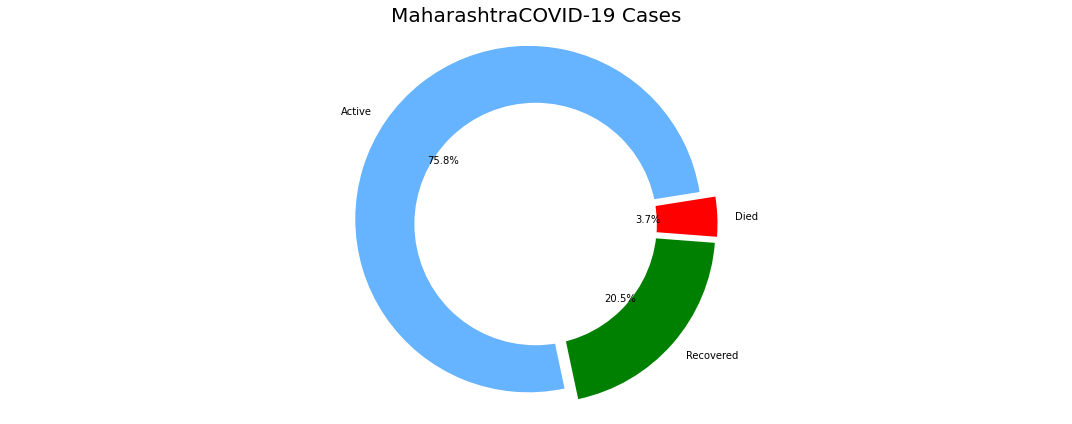

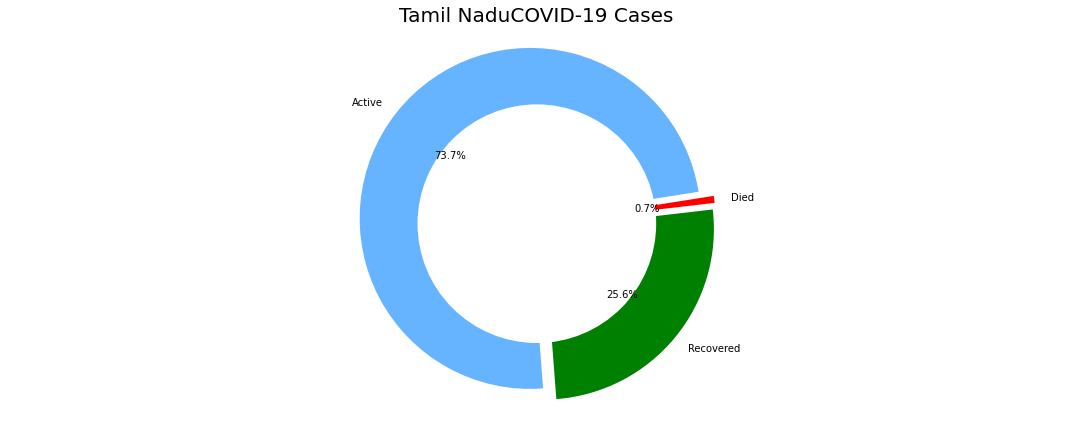

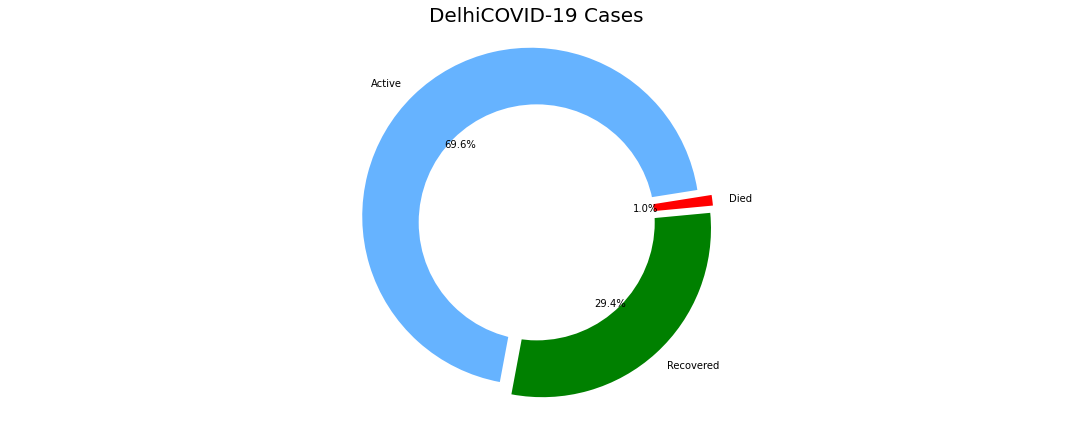

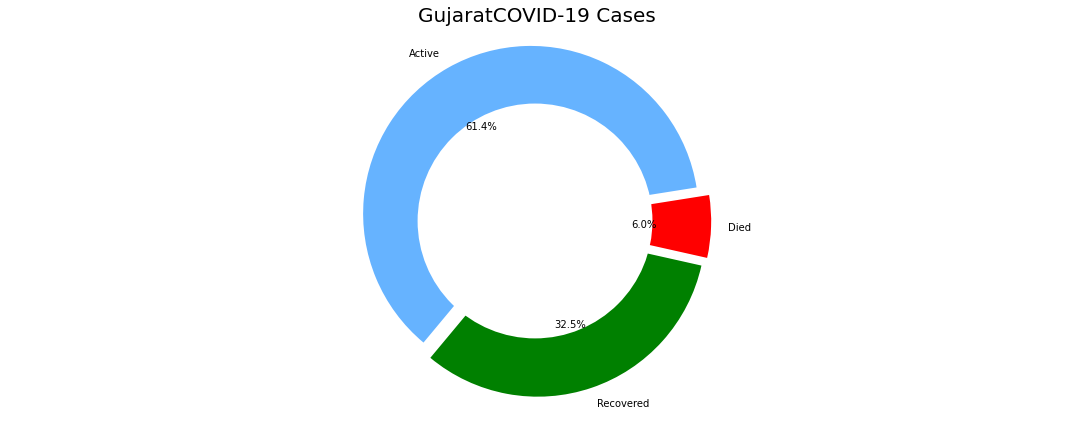

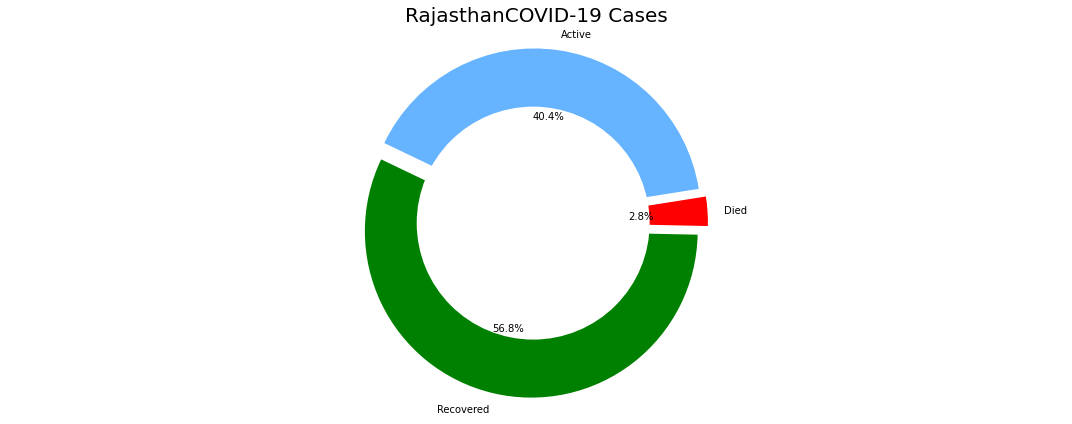

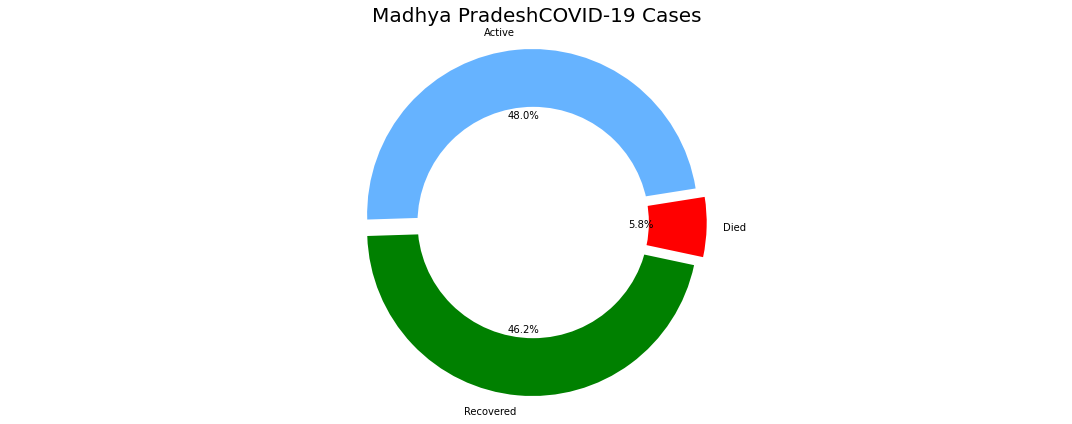

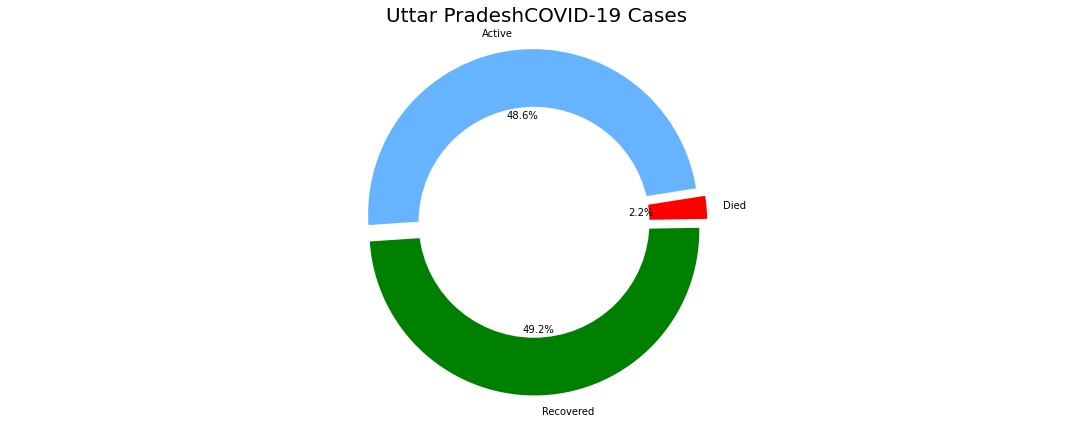

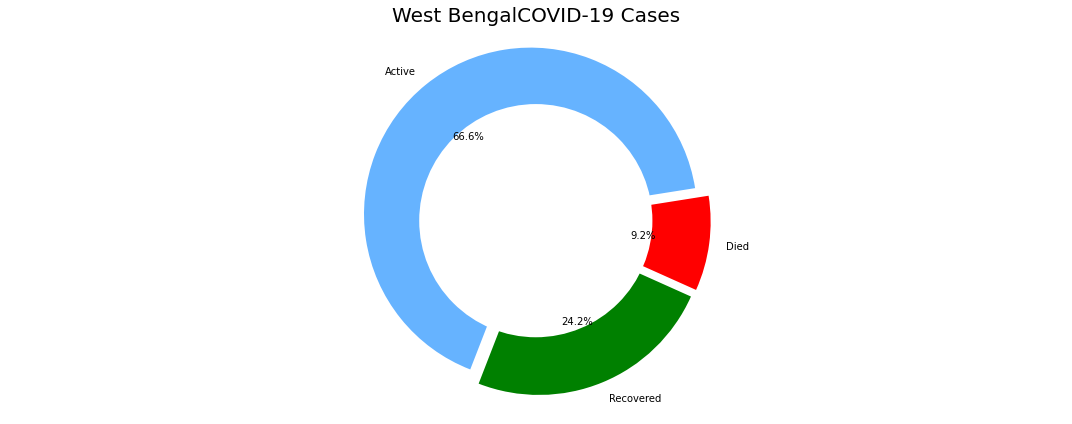

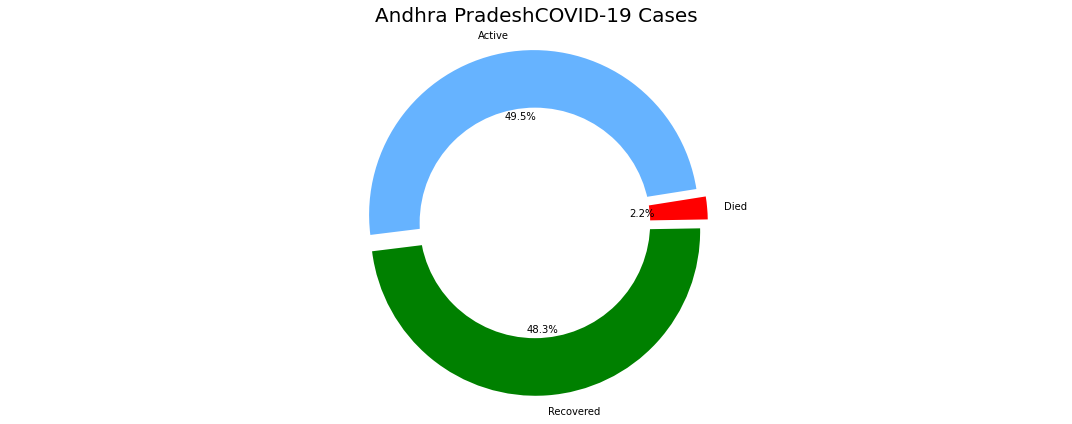

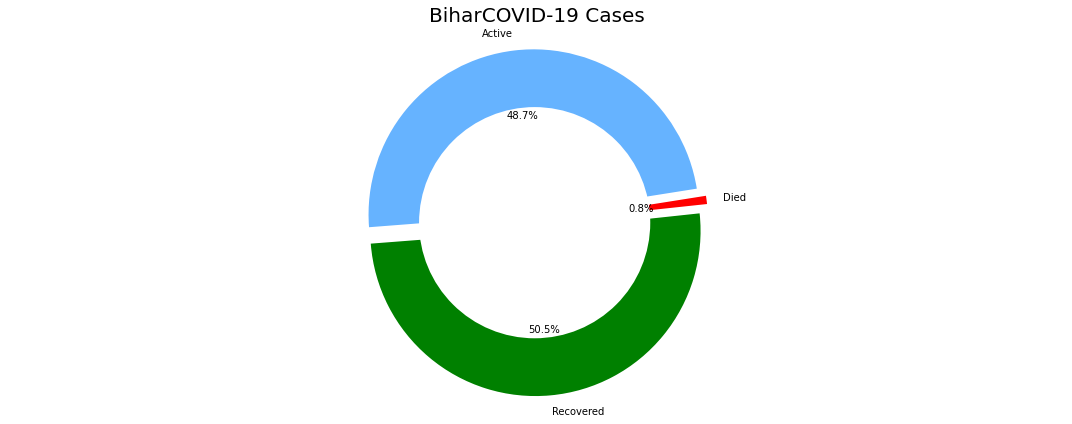

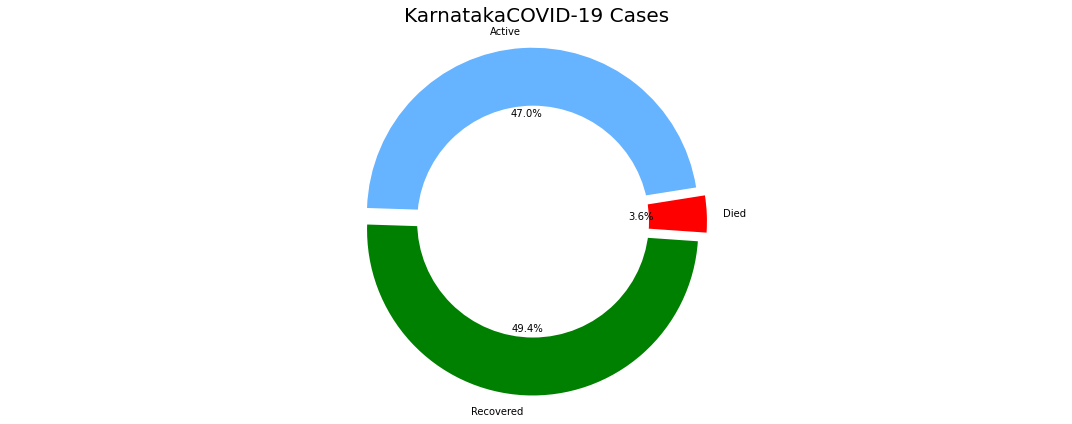

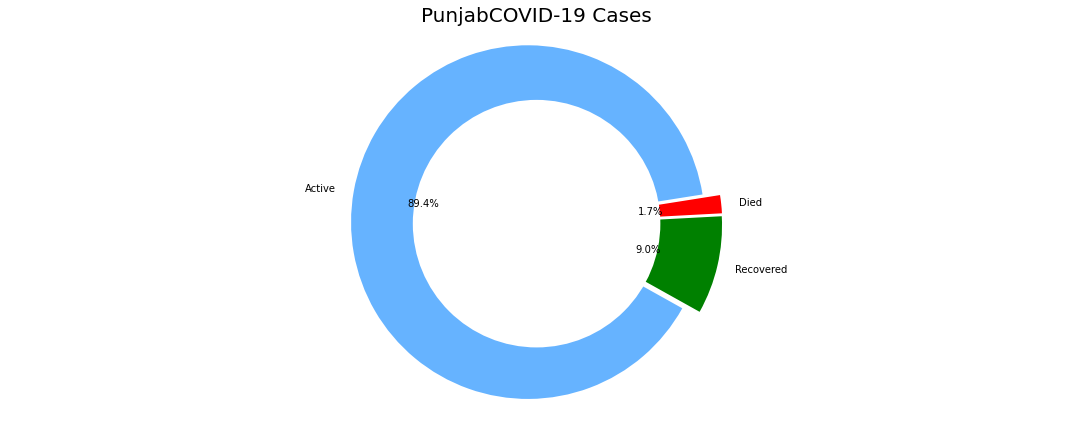

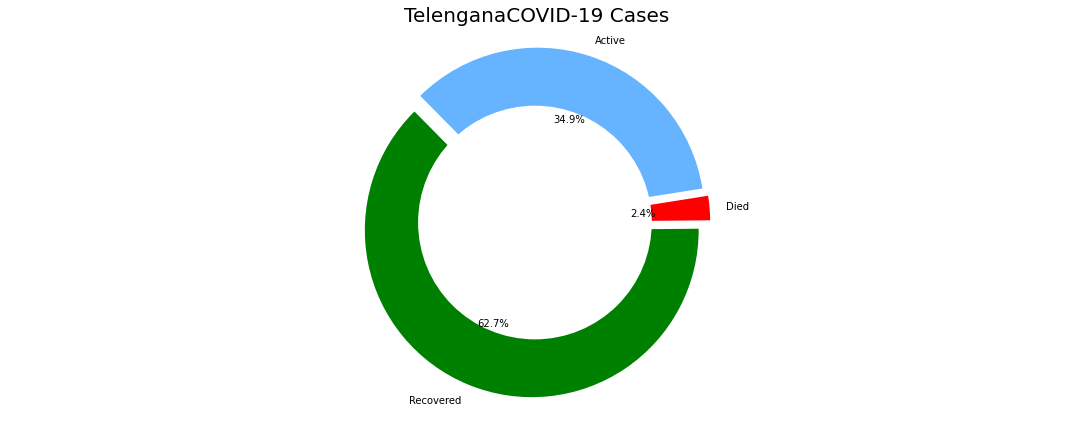

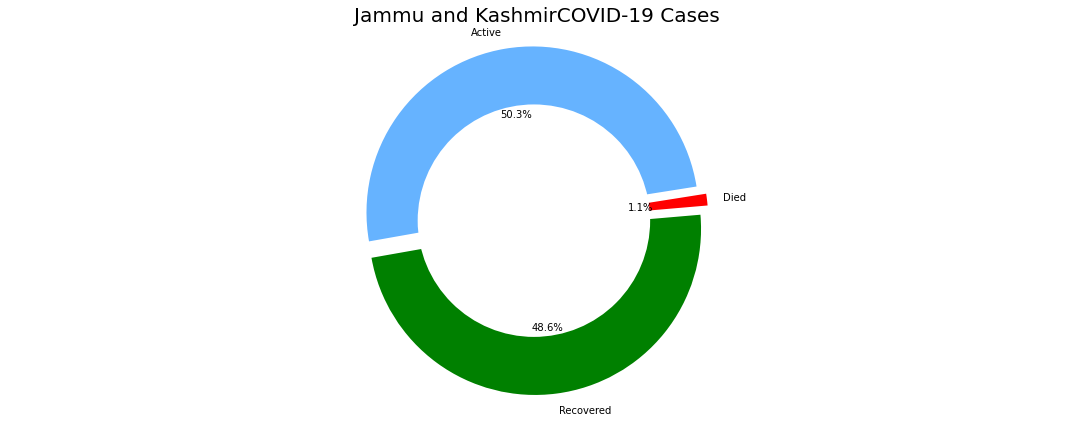

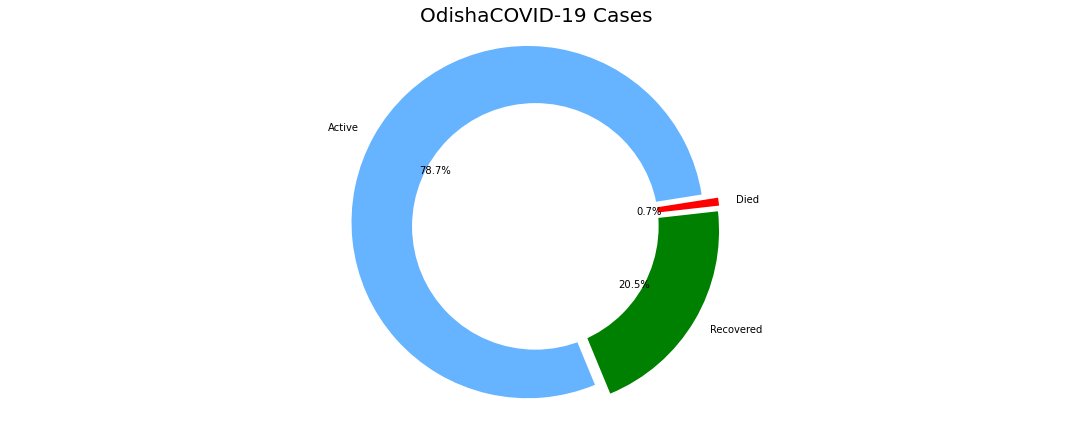

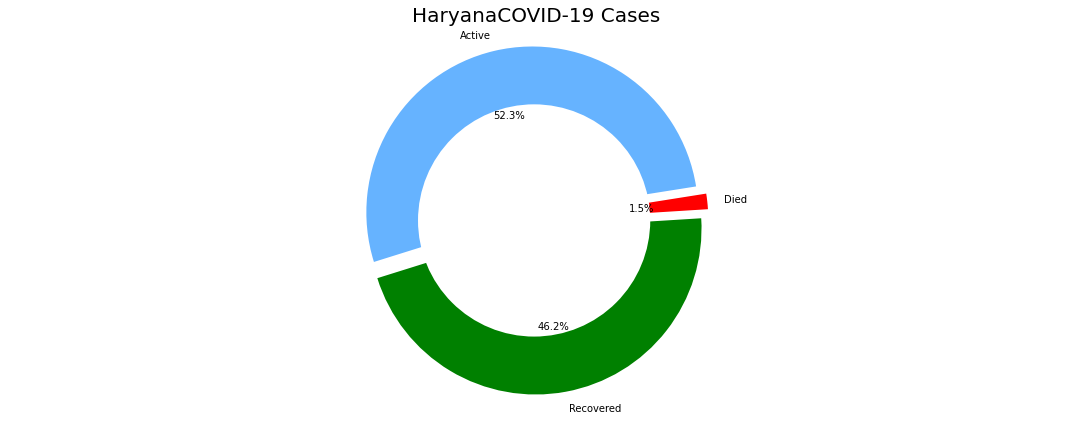

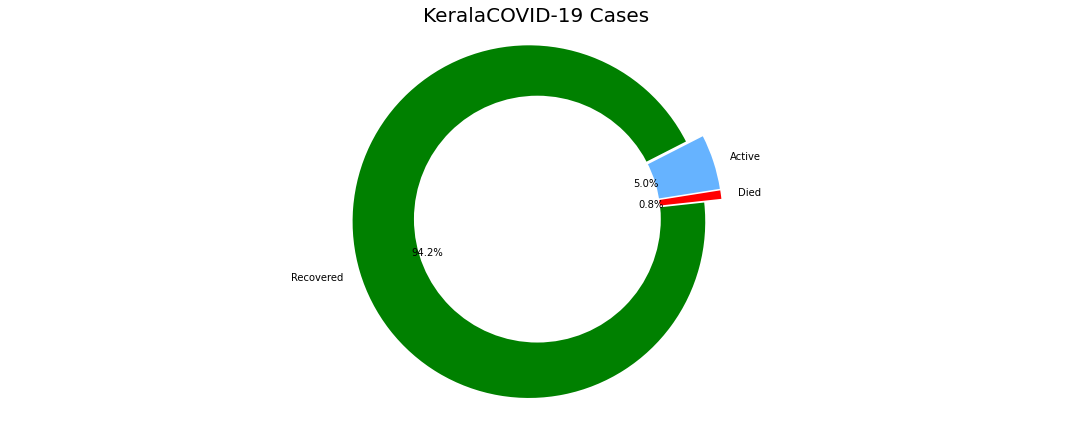

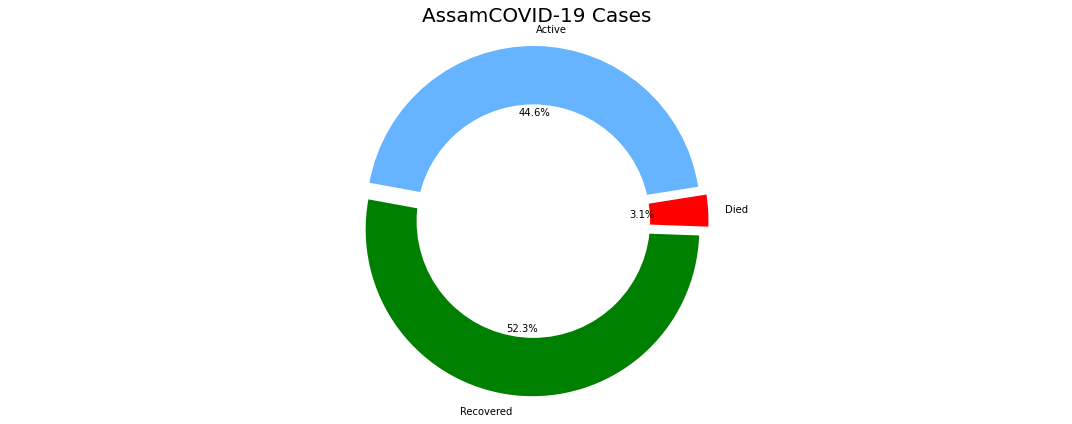

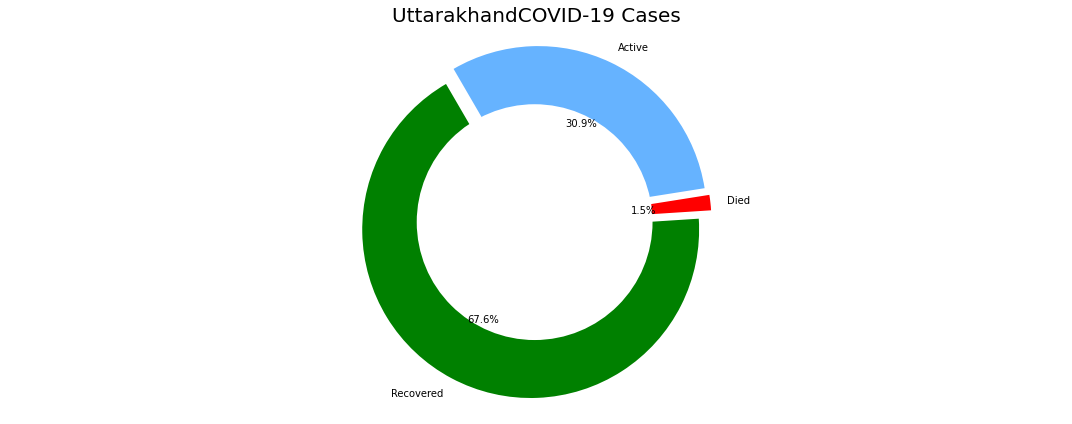

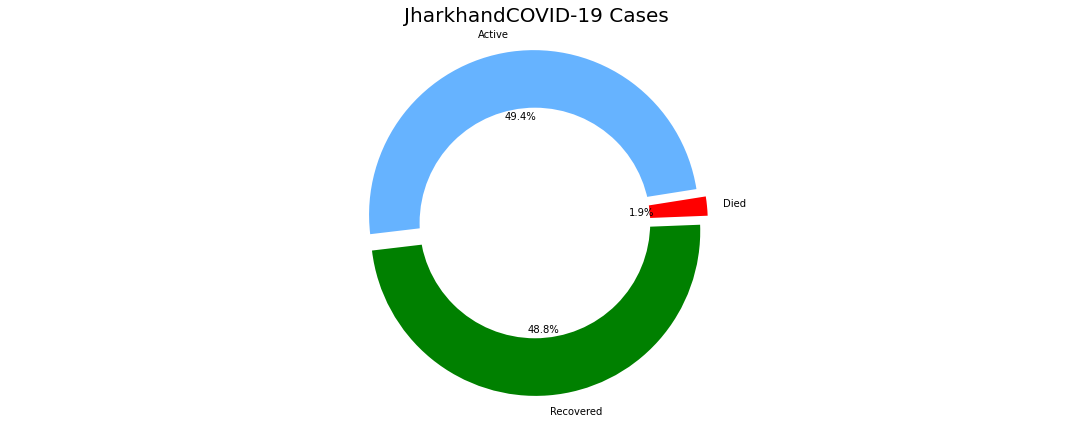

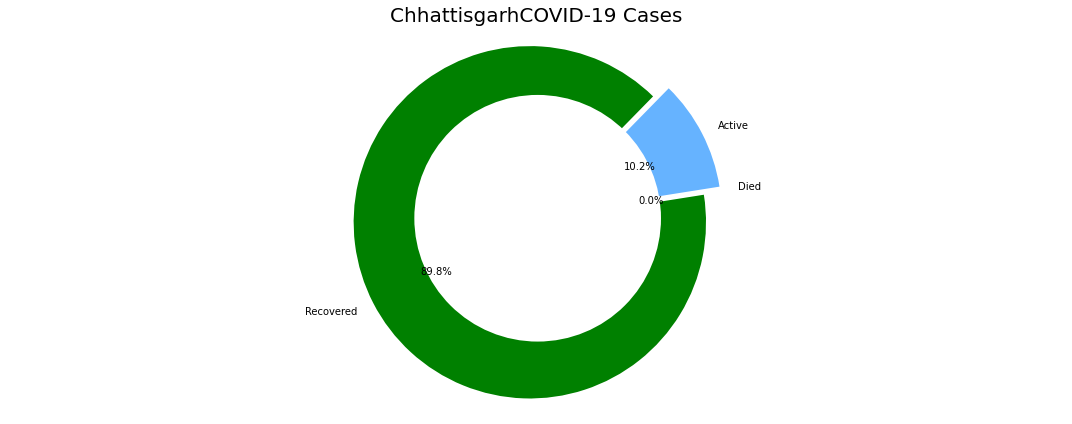

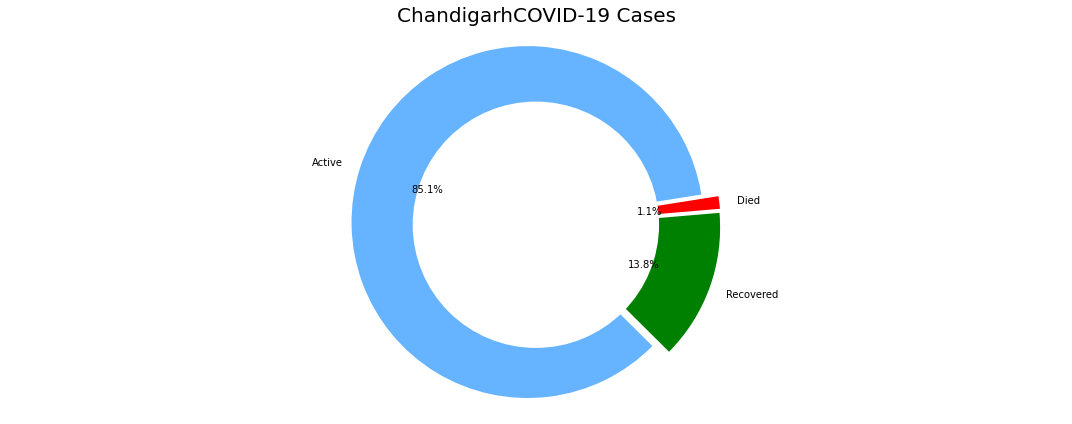

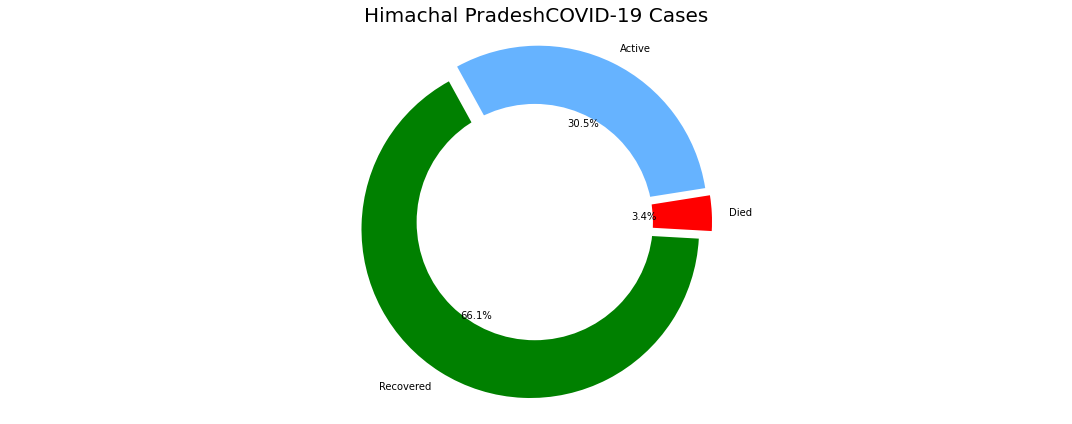

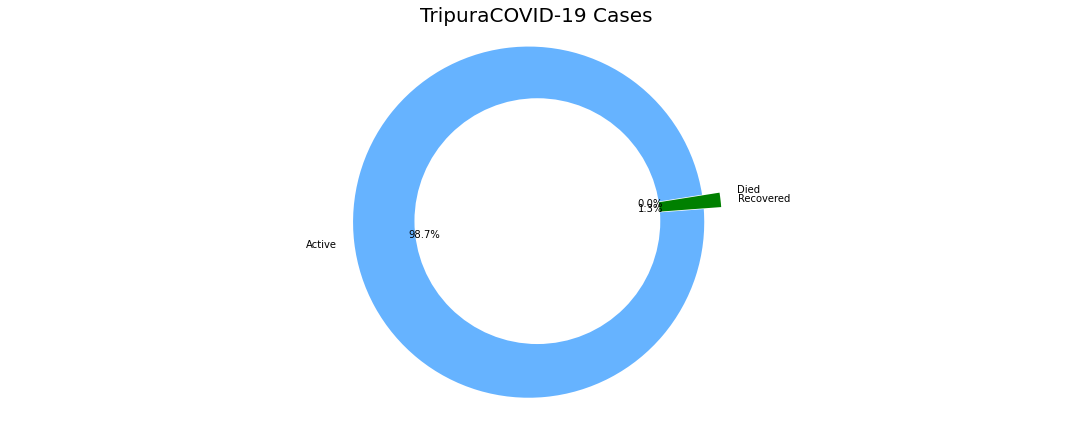

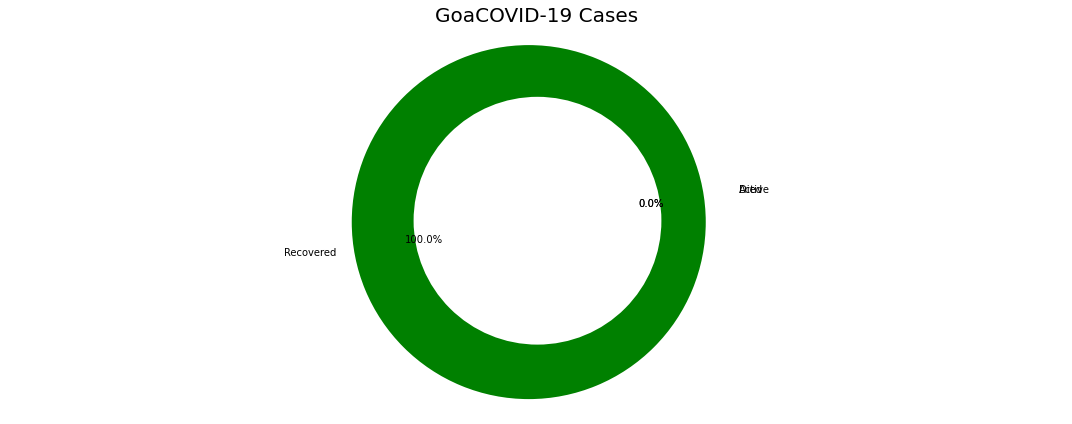

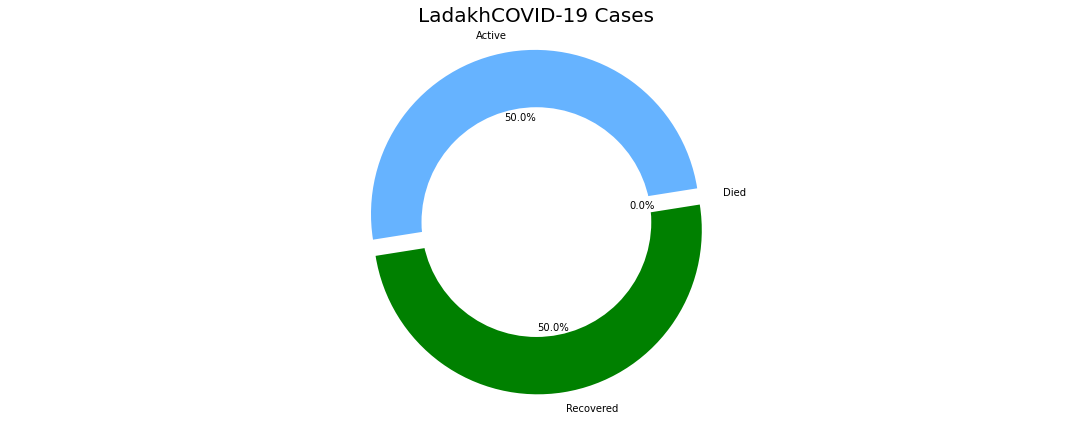

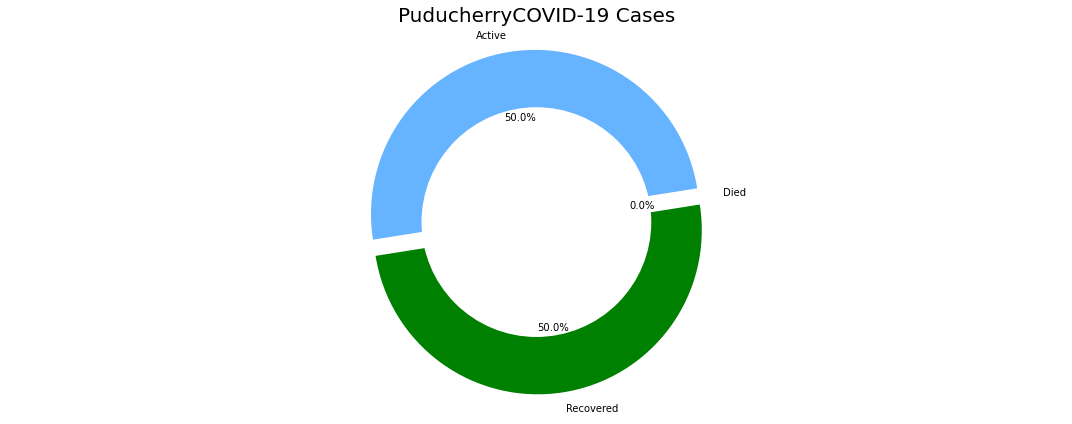

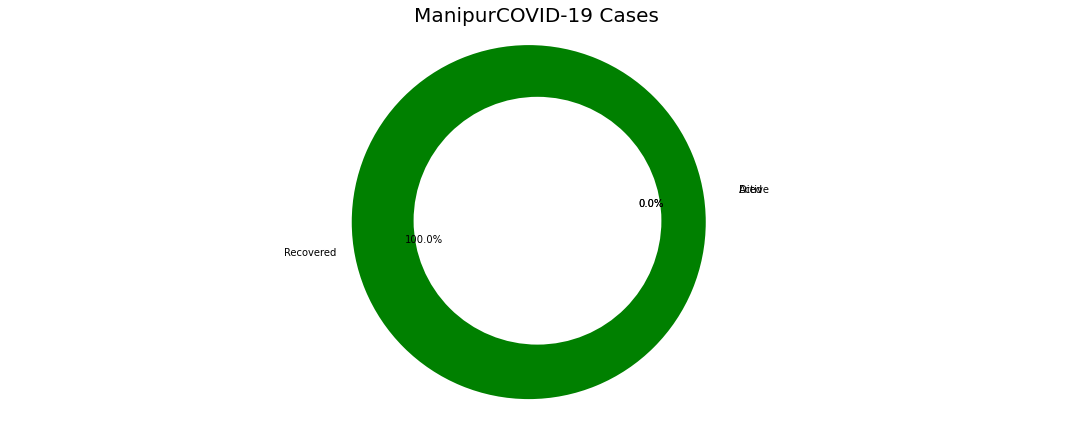

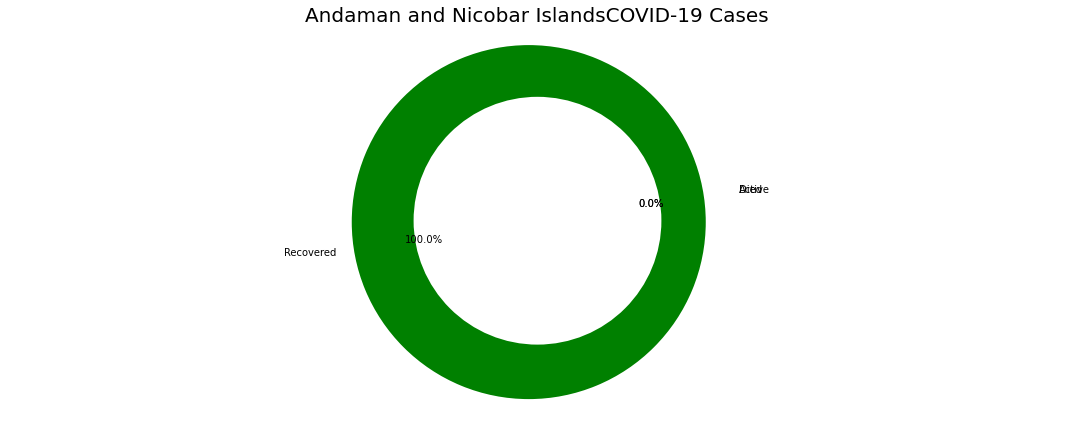

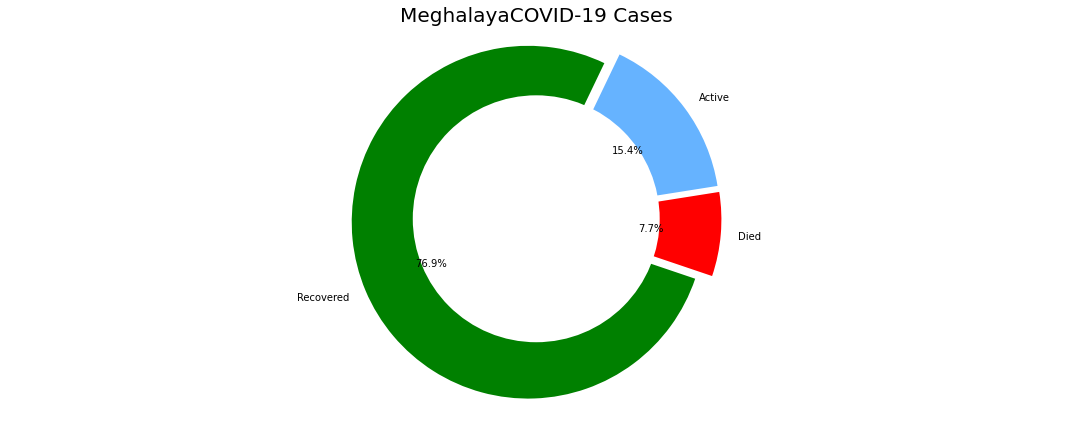

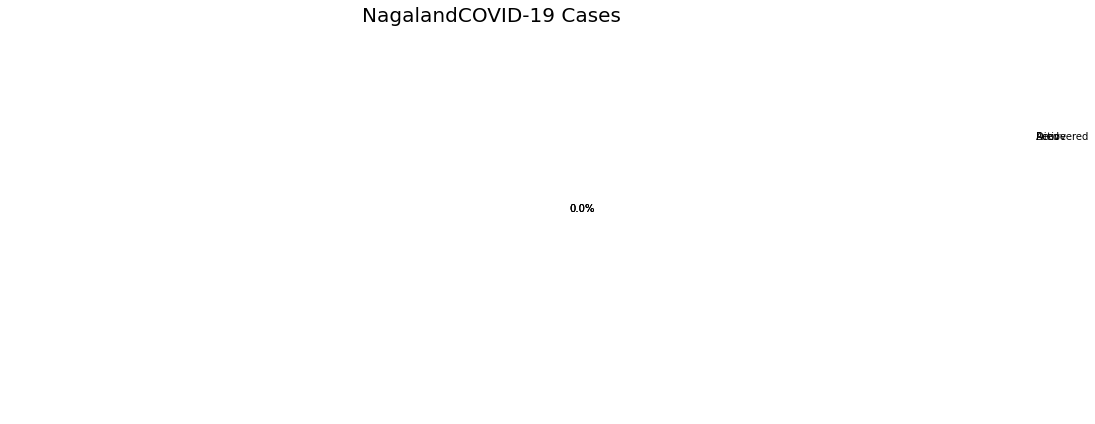

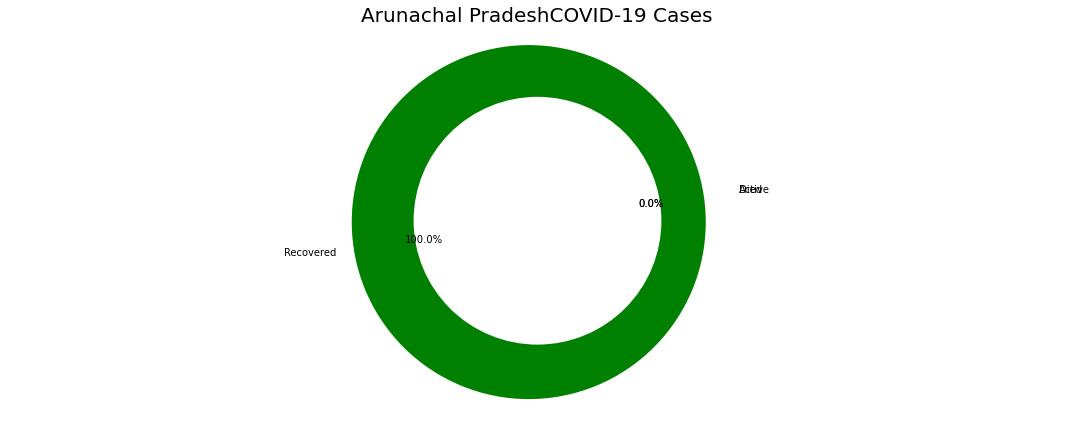

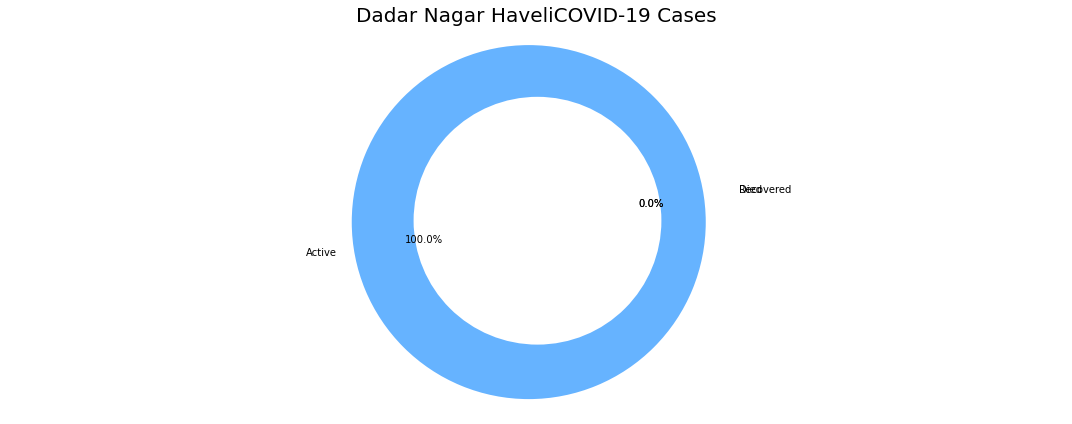

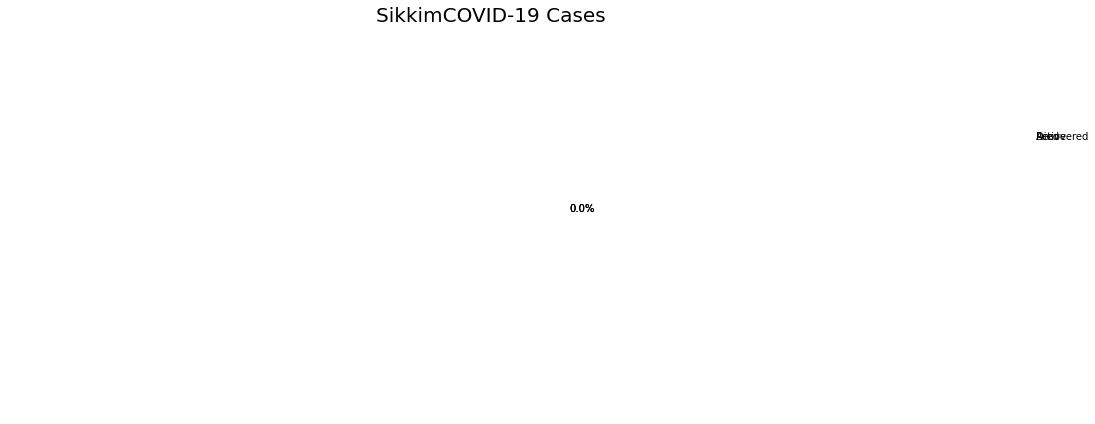

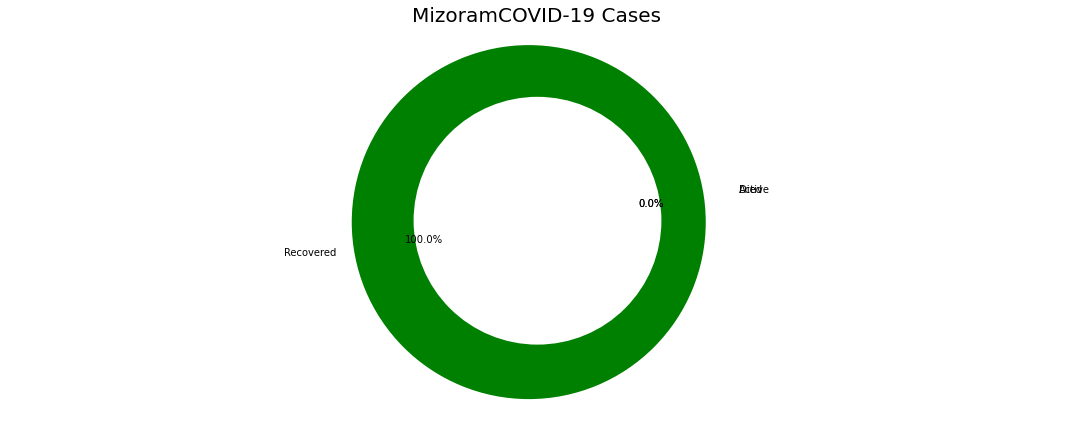

In [24]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()

for state in States:
    one_state_df = df_final_India.loc[df_final_India['State/UnionTerritory'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    total_cases = one_state_df['Confirmed'].values[-1]
    cured = one_state_df['Cured'].values[-1]
    deaths = one_state_df['Deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state)
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active


In [25]:
state_df.reset_index(inplace = True,drop = True)
state_df


Date         State/UnionTerritory Cured Deaths Confirmed New Cases
0  2020-12-05                  Maharashtra  4786    868     23401     21640
1  2020-12-05                   Tamil Nadu  2051     53      8002      7033
2  2020-12-05                        Delhi  2129     73      7233      6164
3  2020-12-05                      Gujarat  2780    513      8541      8109
4  2020-12-05                    Rajasthan  2264    113      3988      3288
5  2020-12-05               Madhya Pradesh  1747    221      3785      3221
6  2020-12-05                Uttar Pradesh  1758     80      3573      3121
7  2020-12-05                  West Bengal   499    190      2063      1929
8  2020-12-05               Andhra Pradesh   975     45      2018      1637
9  2020-12-05                        Bihar   377      6       747       683
10 2020-12-05                    Karnataka   426     31       862       636
11 2020-12-05                       Punjab   168     31      1877      1726
12 2020-12-05                    Telengana   800     30      1275       771
13 2020-12-05            Jammu and Kashmir   427     10       879       655
14 2020-12-05                       Odisha    85      3       414       360
15 2020-12-05                      Haryana   337     11       730       545
16 2020-12-05                       Kerala   489      4       519       145
17 2020-12-05                        Assam    34      2        65        36
18 2020-12-05                  Uttarakhand    46      1        68        33
19 2020-12-05                    Jharkhand    78      3       160       143
20 2020-12-05                 Chhattisgarh    53      0        59        34
21 2020-12-05                   Chandigarh    24      2       174       155
22 2020-12-05             Himachal Pradesh    39      2        59        27
23 2020-12-05                      Tripura     2      0       152       150
24 2020-12-05                          Goa     7      0         7         0
25 2020-12-05                       Ladakh    21      0        42        27
26 2020-12-05                   Puducherry     6      0        12         5
27 2020-12-05                      Manipur     2      0         2         0
28 2020-12-05  Andaman and Nicobar Islands    33      0        33        22
29 2020-12-05                    Meghalaya    10      1        13        13
30 2020-12-05                     Nagaland     0      0         0         0
31 2020-12-05            Arunachal Pradesh     1      0         1         0
32 2020-12-05           Dadar Nagar Haveli     0      0         1         1
33 2020-12-05                       Sikkim     0      0         0         0
34 2020-12-05                      Mizoram     1      0         1         0

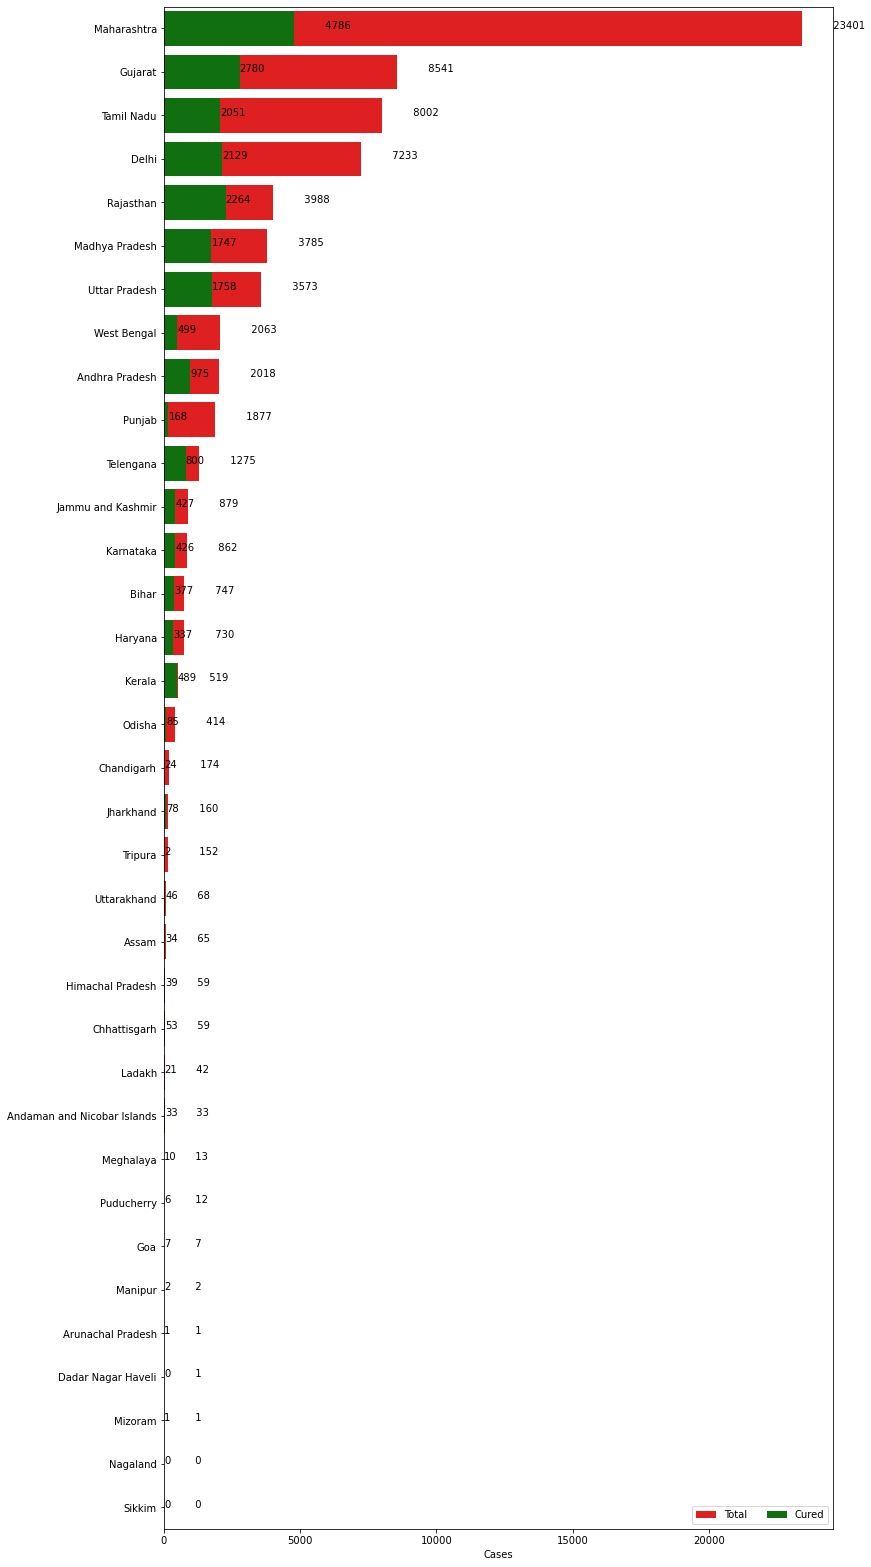

In [26]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
i = 0
for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))
        
    i += 1


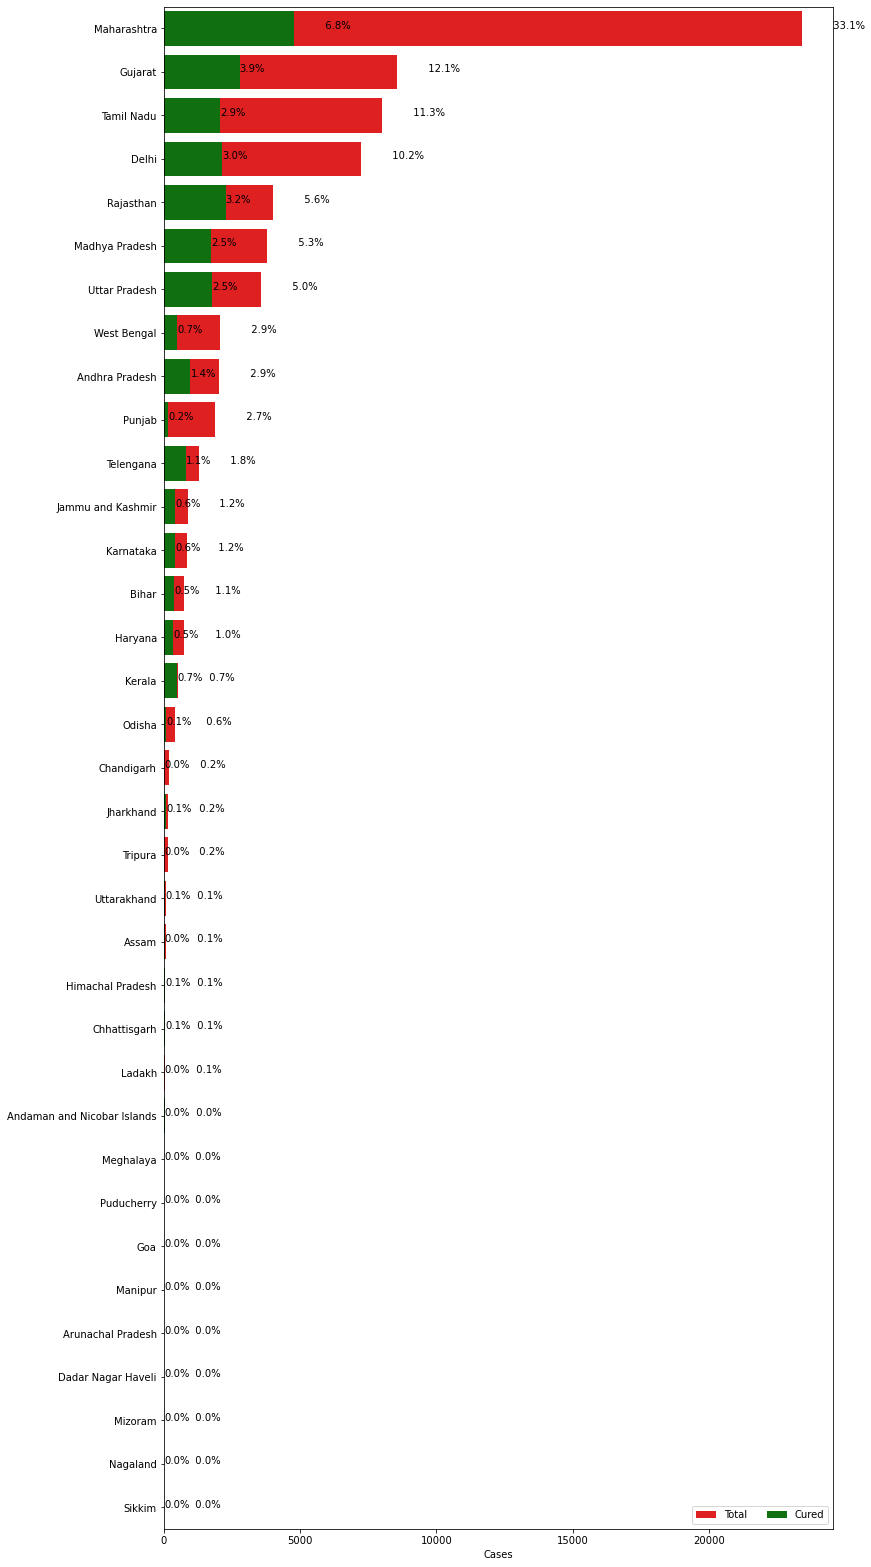

In [27]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1


Total infected cases in India:  70756.0
Total cured cases in India:  22455.0
Total active cases in India:  46008.0
Total death cases in India:  2293.0


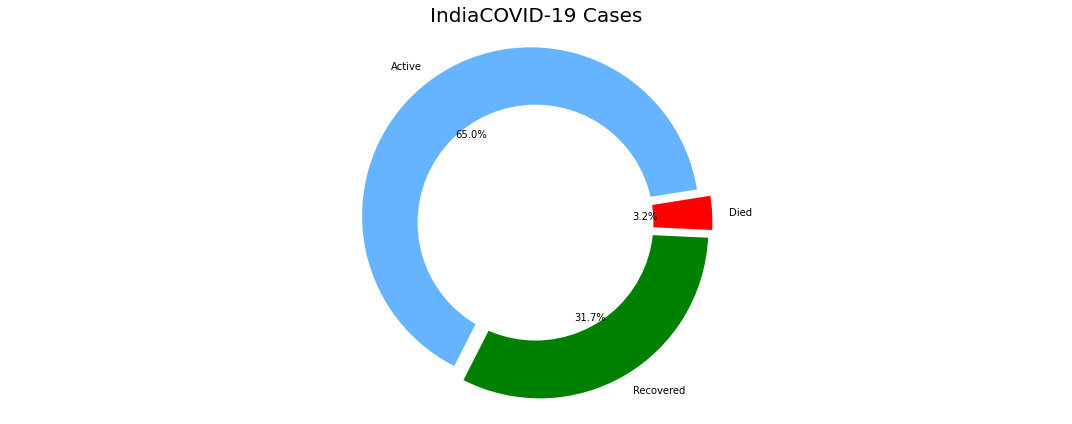

In [28]:
print("Total infected cases in India: ", total_cases_india)
print("Total cured cases in India: ", cured_cases_india)
print("Total active cases in India: ", active_cases_india)
print("Total death cases in India: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")


# visualising the spreads geographically

In [29]:
India_coord.rename(columns = {"Name of State / UT" : "State/UnionTerritory"},inplace = True)

In [30]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar ',
 'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli ',
 'Goa',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Ladakh',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Manipur',
 'Manipur ',
 'Meghalaya',
 'Meghalaya ',
 'Mizoram',
 'Mizoram ',
 'Nagaland',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry',
 'Puducherry ',
 'Sikkim',
 'Sikkim ',
 'Tripura',
 'Tripura ',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [31]:
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()


In [32]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Gujarat',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [33]:
India_coord.loc[India_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
India_coord


State/UnionTerritory Latitude Longitude
0                    Andaman And Nicobar   11.667    92.736
1                         Andhra Pradesh  14.7504     78.57
2                      Arunachal Pradesh  27.1004   93.6166
3                                  Assam    26.75   94.2167
4                                  Bihar  25.7854     87.48
5                             Chandigarh    30.72     76.78
6                           Chhattisgarh  22.0904     82.16
7                 Dadra And Nagar Haveli  20.2666   73.0166
8                                  Delhi    28.67     77.23
9                                    Goa   15.492    73.818
10                               Haryana    28.45     77.02
11                      Himachal Pradesh     31.1   77.1666
12  Union Territory of Jammu and Kashmir    33.45     76.24
13                             Jharkhand  23.8004     86.42
14                             Karnataka  12.5704     76.92
15                                Kerala  8.90037     76.57
16                           Lakshadweep  10.5626   72.6369
17                        Madhya Pradesh  21.3004     76.13
18                           Maharashtra  19.2502   73.1602
19                               Manipur     24.8     93.95
20                             Meghalaya  25.5705     91.88
21                               Mizoram  23.7104     92.72
22                              Nagaland   25.667   94.1166
23                                Orissa  19.8204      85.9
24                            Puducherry   11.935     79.83
25                                Punjab    31.52     75.98
26                             Rajasthan    26.45     74.64
27                                Sikkim  27.3333   88.6166
28                             Telengana  18.1124   79.0193
29                            Tamil Nadu  12.9204     79.15
30                               Tripura  23.8354     91.28
31                         Uttar Pradesh     27.6     78.05
32                           Uttarakhand  30.3204     78.05
33                           West Bengal  22.5804   88.3299
34             Union Territory of Ladakh     34.1     77.34
35                               Gujarat  22.2587   71.1924

In [34]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [35]:
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",India_coord['State/UnionTerritory'])


In [36]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Lakshadweep'}

In [37]:
India_coord

State/UnionTerritory Latitude Longitude
0   Andaman and Nicobar Islands   11.667    92.736
1                Andhra Pradesh  14.7504     78.57
2             Arunachal Pradesh  27.1004   93.6166
3                         Assam    26.75   94.2167
4                         Bihar  25.7854     87.48
5                    Chandigarh    30.72     76.78
6                  Chhattisgarh  22.0904     82.16
7            Dadar Nagar Haveli  20.2666   73.0166
8                         Delhi    28.67     77.23
9                           Goa   15.492    73.818
10                      Haryana    28.45     77.02
11             Himachal Pradesh     31.1   77.1666
12            Jammu and Kashmir    33.45     76.24
13                    Jharkhand  23.8004     86.42
14                    Karnataka  12.5704     76.92
15                       Kerala  8.90037     76.57
16                  Lakshadweep  10.5626   72.6369
17               Madhya Pradesh  21.3004     76.13
18                  Maharashtra  19.2502   73.1602
19                      Manipur     24.8     93.95
20                    Meghalaya  25.5705     91.88
21                      Mizoram  23.7104     92.72
22                     Nagaland   25.667   94.1166
23                       Odisha  19.8204      85.9
24                   Puducherry   11.935     79.83
25                       Punjab    31.52     75.98
26                    Rajasthan    26.45     74.64
27                       Sikkim  27.3333   88.6166
28                    Telengana  18.1124   79.0193
29                   Tamil Nadu  12.9204     79.15
30                      Tripura  23.8354     91.28
31                Uttar Pradesh     27.6     78.05
32                  Uttarakhand  30.3204     78.05
33                  West Bengal  22.5804   88.3299
34                       Ladakh     34.1     77.34
35                      Gujarat  22.2587   71.1924

In [38]:
df_full = pd.merge(India_coord,state_df,on='State/UnionTerritory').reset_index(drop = True)
df_full


State/UnionTerritory Latitude Longitude       Date Cured Deaths  \
0   Andaman and Nicobar Islands   11.667    92.736 2020-12-05    33      0   
1                Andhra Pradesh  14.7504     78.57 2020-12-05   975     45   
2             Arunachal Pradesh  27.1004   93.6166 2020-12-05     1      0   
3                         Assam    26.75   94.2167 2020-12-05    34      2   
4                         Bihar  25.7854     87.48 2020-12-05   377      6   
5                    Chandigarh    30.72     76.78 2020-12-05    24      2   
6                  Chhattisgarh  22.0904     82.16 2020-12-05    53      0   
7            Dadar Nagar Haveli  20.2666   73.0166 2020-12-05     0      0   
8                         Delhi    28.67     77.23 2020-12-05  2129     73   
9                           Goa   15.492    73.818 2020-12-05     7      0   
10                      Haryana    28.45     77.02 2020-12-05   337     11   
11             Himachal Pradesh     31.1   77.1666 2020-12-05    39      2   
12            Jammu and Kashmir    33.45     76.24 2020-12-05   427     10   
13                    Jharkhand  23.8004     86.42 2020-12-05    78      3   
14                    Karnataka  12.5704     76.92 2020-12-05   426     31   
15                       Kerala  8.90037     76.57 2020-12-05   489      4   
16               Madhya Pradesh  21.3004     76.13 2020-12-05  1747    221   
17                  Maharashtra  19.2502   73.1602 2020-12-05  4786    868   
18                      Manipur     24.8     93.95 2020-12-05     2      0   
19                    Meghalaya  25.5705     91.88 2020-12-05    10      1   
20                      Mizoram  23.7104     92.72 2020-12-05     1      0   
21                     Nagaland   25.667   94.1166 2020-12-05     0      0   
22                       Odisha  19.8204      85.9 2020-12-05    85      3   
23                   Puducherry   11.935     79.83 2020-12-05     6      0   
24                       Punjab    31.52     75.98 2020-12-05   168     31   
25                    Rajasthan    26.45     74.64 2020-12-05  2264    113   
26                       Sikkim  27.3333   88.6166 2020-12-05     0      0   
27                    Telengana  18.1124   79.0193 2020-12-05   800     30   
28                   Tamil Nadu  12.9204     79.15 2020-12-05  2051     53   
29                      Tripura  23.8354     91.28 2020-12-05     2      0   
30                Uttar Pradesh     27.6     78.05 2020-12-05  1758     80   
31                  Uttarakhand  30.3204     78.05 2020-12-05    46      1   
32                  West Bengal  22.5804   88.3299 2020-12-05   499    190   
33                       Ladakh     34.1     77.34 2020-12-05    21      0   
34                      Gujarat  22.2587   71.1924 2020-12-05  2780    513   

   Confirmed New Cases  
0         33        22  
1       2018      1637  
2          1         0  
3         65        36  
4        747       683  
5        174       155  
6         59        34  
7          1         1  
8       7233      6164  
9          7         0  
10       730       545  
11        59        27  
12       879       655  
13       160       143  
14       862       636  
15       519       145  
16      3785      3221  
17     23401     21640  
18         2         0  
19        13        13  
20         1         0  
21         0         0  
22       414       360  
23        12         5  
24      1877      1726  
25      3988      3288  
26         0         0  
27      1275       771  
28      8002      7033  
29       152       150  
30      3573      3121  
31        68        33  
32      2063      1929  
33        42        27  
34      8541      8109

In [39]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map


In [40]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='OpenStreetMap')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map


In [41]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='StamenWaterColor')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map


In [42]:
df_daywise_India = df_final_India.groupby("Date")['Confirmed','Cured','Deaths',"New Cases"].sum().reset_index()
df_daywise_India


Date  Confirmed    Cured  Deaths  New Cases
0   2020-01-03        3.0      0.0     0.0        1.0
1   2020-01-04     1834.0    144.0    41.0     1831.0
2   2020-01-05    34972.0   9065.0  1152.0    33138.0
3   2020-01-06        0.0      0.0     0.0   -34972.0
4   2020-01-07        0.0      0.0     0.0        0.0
..         ...        ...      ...     ...        ...
333 2020-12-01        0.0      0.0     0.0        0.0
334 2020-12-02        3.0      0.0     0.0        3.0
335 2020-12-03       74.0      3.0     0.0       71.0
336 2020-12-04     8447.0    765.0   273.0     8373.0
337 2020-12-05    70756.0  22455.0  2293.0    62309.0

[338 rows x 5 columns]

In [43]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_India['Date'], y = df_daywise_India['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [44]:
fig = px.bar(df_daywise_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()


In [45]:
fig = px.bar(df_daywise_India, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


# Forecasting Using fbprophet

In [47]:
from fbprophet import Prophet

In [48]:
df = df_daywise_India.iloc[:-1,]
df_train = df.loc[df['Date']<= "2020-05-23",:]
df_test = df.loc[df['Date'] > "2020-05-23",:]


In [49]:
confirmed_train=df_train[['Date','Confirmed']]
confirmed_test=df_test[['Date','Confirmed']]

deaths_train=df_train[['Date','Deaths']]
deaths_test=df_test[['Date','Deaths']]

recoverd_train=df_train[['Date','Cured']]
recoverd_test=df_test[['Date','Cured']]

In [50]:
confirmed_train.columns=['ds','y']
confirmed_train.tail()

ds         y
137 2020-05-19  100325.0
138 2020-05-20  105654.0
139 2020-05-21  110956.0
140 2020-05-22  116827.0
141 2020-05-23  123202.0

In [52]:
m=Prophet()
m.fit(confirmed_train)
future=m.make_future_dataframe(periods=5,freq="D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
142 2020-05-24
143 2020-05-25
144 2020-05-26
145 2020-05-27
146 2020-05-28

In [53]:
m=Prophet()
m.fit(confirmed_train)
future=m.make_future_dataframe(periods=5,freq="M")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
142 2020-05-31
143 2020-06-30
144 2020-07-31
145 2020-08-31
146 2020-09-30

In [54]:
m=Prophet()
m.fit(confirmed_train)
future=m.make_future_dataframe(periods=5,freq="Y")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
142 2020-12-31
143 2021-12-31
144 2022-12-31
145 2023-12-31
146 2024-12-31

In [55]:
forecast=m.predict(future)
forecast

ds         trend     yhat_lower    yhat_upper    trend_lower  \
0   2020-01-03 -3.863195e+03  -28473.527895  1.815589e+04   -3863.195208   
1   2020-01-04 -3.759854e+03  -27278.146804  1.817165e+04   -3759.853941   
2   2020-01-05 -3.656513e+03  -27410.507114  1.813966e+04   -3656.512674   
3   2020-01-06 -3.553171e+03  -30263.506575  1.701176e+04   -3553.171407   
4   2020-01-07 -3.449830e+03  -27394.850320  2.048047e+04   -3449.830140   
..         ...           ...            ...           ...            ...   
142 2020-12-31  2.974859e+05  238118.632367  3.618321e+05  239458.959892   
143 2021-12-31  6.933362e+05  438448.200428  9.442191e+05  442528.785715   
144 2022-12-31  1.089187e+06  565913.621114  1.599191e+06  569571.815188   
145 2023-12-31  1.485037e+06  647800.619626  2.285912e+06  641255.616167   
146 2024-12-31  1.881972e+06  610218.929733  3.096565e+06  605126.607013   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -3.863195e+03     -675.024529           -675.024529           -675.024529   
1   -3.759854e+03     -269.217431           -269.217431           -269.217431   
2   -3.656513e+03       52.481101             52.481101             52.481101   
3   -3.553171e+03    -3186.262101          -3186.262101          -3186.262101   
4   -3.449830e+03     -888.197489           -888.197489           -888.197489   
..            ...             ...                   ...                   ...   
142  3.568060e+05     2598.176005           2598.176005           2598.176005   
143  9.453506e+05     -675.024529           -675.024529           -675.024529   
144  1.597561e+06     -269.217431           -269.217431           -269.217431   
145  2.299042e+06       52.481101             52.481101             52.481101   
146  3.085496e+06     -888.197489           -888.197489           -888.197489   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -675.024529   -675.024529   -675.024529                   0.0   
1    -269.217431   -269.217431   -269.217431                   0.0   
2      52.481101     52.481101     52.481101                   0.0   
3   -3186.262101  -3186.262101  -3186.262101                   0.0   
4    -888.197489   -888.197489   -888.197489                   0.0   
..           ...           ...           ...                   ...   
142  2598.176005   2598.176005   2598.176005                   0.0   
143  -675.024529   -675.024529   -675.024529                   0.0   
144  -269.217431   -269.217431   -269.217431                   0.0   
145    52.481101     52.481101     52.481101                   0.0   
146  -888.197489   -888.197489   -888.197489                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -4.538220e+03  
1                           0.0                         0.0 -4.029071e+03  
2                           0.0                         0.0 -3.604032e+03  
3                           0.0                         0.0 -6.739434e+03  
4                           0.0                         0.0 -4.338028e+03  
..                          ...                         ...           ...  
142                         0.0                         0.0  3.000841e+05  
143                         0.0                         0.0  6.926612e+05  
144                         0.0                         0.0  1.088917e+06  
145                         0.0                         0.0  1.485089e+06  
146                         0.0                         0.0  1.881084e+06  

[147 rows x 16 columns]

In [56]:
result_df=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)
result_df['Actual']=confirmed_test['Confirmed']
result_df

ds          yhat     yhat_lower    yhat_upper    Actual
142 2020-12-31  3.000841e+05  238118.632367  3.618321e+05  129530.0
143 2021-12-31  6.926612e+05  438448.200428  9.442191e+05  136203.0
144 2022-12-31  1.088917e+06  565913.621114  1.599191e+06  142410.0
145 2023-12-31  1.485089e+06  647800.619626  2.285912e+06  147754.0
146 2024-12-31  1.881084e+06  610218.929733  3.096565e+06  154001.0

In [57]:
m=Prophet()
m.fit(confirmed_train)
future=m.make_future_dataframe(periods=5,freq="D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
142 2020-05-24
143 2020-05-25
144 2020-05-26
145 2020-05-27
146 2020-05-28

In [59]:
forecast=m.predict(future)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-03  -3863.195208 -29057.335651  17796.028870  -3863.195208   
1   2020-01-04  -3759.853941 -27163.702198  19003.670937  -3759.853941   
2   2020-01-05  -3656.512674 -27831.738700  20898.642715  -3656.512674   
3   2020-01-06  -3553.171407 -29247.060829  16322.954015  -3553.171407   
4   2020-01-07  -3449.830140 -27537.962575  19392.661701  -3449.830140   
..         ...           ...           ...           ...           ...   
142 2020-05-24  57806.627095  32559.150734  81130.659711  57806.627095   
143 2020-05-25  58891.148621  31465.580539  77717.449929  58878.383183   
144 2020-05-26  59975.670148  37009.915584  81164.319835  59929.704614   
145 2020-05-27  61060.191674  40955.282156  86136.785059  60967.121521   
146 2020-05-28  62144.713200  40838.557224  88247.723119  61999.466012   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    -3863.195208     -675.024529           -675.024529           -675.024529   
1    -3759.853941     -269.217431           -269.217431           -269.217431   
2    -3656.512674       52.481101             52.481101             52.481101   
3    -3553.171407    -3186.262101          -3186.262101          -3186.262101   
4    -3449.830140     -888.197489           -888.197489           -888.197489   
..            ...             ...                   ...                   ...   
142  57806.627095       52.481101             52.481101             52.481101   
143  58897.252247    -3186.262101          -3186.262101          -3186.262101   
144  60002.660780     -888.197489           -888.197489           -888.197489   
145  61122.711947     2368.044445           2368.044445           2368.044445   
146  62254.697145     2598.176005           2598.176005           2598.176005   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0    -675.024529   -675.024529   -675.024529                   0.0   
1    -269.217431   -269.217431   -269.217431                   0.0   
2      52.481101     52.481101     52.481101                   0.0   
3   -3186.262101  -3186.262101  -3186.262101                   0.0   
4    -888.197489   -888.197489   -888.197489                   0.0   
..           ...           ...           ...                   ...   
142    52.481101     52.481101     52.481101                   0.0   
143 -3186.262101  -3186.262101  -3186.262101                   0.0   
144  -888.197489   -888.197489   -888.197489                   0.0   
145  2368.044445   2368.044445   2368.044445                   0.0   
146  2598.176005   2598.176005   2598.176005                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0  -4538.219737  
1                           0.0                         0.0  -4029.071372  
2                           0.0                         0.0  -3604.031573  
3                           0.0                         0.0  -6739.433507  
4                           0.0                         0.0  -4338.027629  
..                          ...                         ...           ...  
142                         0.0                         0.0  57859.108196  
143                         0.0                         0.0  55704.886521  
144                         0.0                         0.0  59087.472658  
145                         0.0                         0.0  63428.236118  
146                         0.0                         0.0  64742.889205  

[147 rows x 16 columns]

In [60]:
result_df=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)
result_df['Actual']=confirmed_test['Confirmed']
result_df

ds          yhat    yhat_lower    yhat_upper    Actual
142 2020-05-24  57859.108196  32559.150734  81130.659711  129530.0
143 2020-05-25  55704.886521  31465.580539  77717.449929  136203.0
144 2020-05-26  59087.472658  37009.915584  81164.319835  142410.0
145 2020-05-27  63428.236118  40955.282156  86136.785059  147754.0
146 2020-05-28  64742.889205  40838.557224  88247.723119  154001.0

In [71]:
trace0= go.Scatter(
        x=result_df['ds'],
        y=result_df['Actual'],
        mode='lines+markers',
        name='Actuals',
        line=dict(color='#dd0000',shape='linear'),
        opacity=0.3,
        connectgaps=True
)
trace1= go.Scatter(
        x=result_df['ds'],
        y=result_df['yhat'],
        name='Predicted',
        mode='lines+markers',
        
        marker=dict(
            size=10,
            color='#44dd00'),
        opacity=0.3
)
data=[trace0,trace1]
layout=go.Layout(
     yaxis=dict(
         title="Results for Prophet(Total Cases)" 
     )
)
fig=go.Figure(data=data, layout=layout)
fig.show()

In [66]:
recoverd_train.columns=['ds','y']
recoverd_train.tail()

ds        y
137 2020-05-19  39174.0
138 2020-05-20  42298.0
139 2020-05-21  45300.0
140 2020-05-22  48534.0
141 2020-05-23  51784.0

In [67]:
m=Prophet()
m.fit(recoverd_train)
future=m.make_future_dataframe(periods=5,freq="D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
142 2020-05-24
143 2020-05-25
144 2020-05-26
145 2020-05-27
146 2020-05-28

In [68]:
forecast=m.predict(future)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-03   -473.250986  -8681.592177   8003.877412   -473.250986   
1   2020-01-04   -457.782311  -8654.565338   7528.608131   -457.782311   
2   2020-01-05   -442.313635  -9136.844876   8046.385833   -442.313635   
3   2020-01-06   -426.844960  -9848.875503   7808.616940   -426.844960   
4   2020-01-07   -411.376285  -9318.201854   8172.127725   -411.376285   
..         ...           ...           ...           ...           ...   
142 2020-05-24  23452.798113  14290.643114  31505.246910  23452.798113   
143 2020-05-25  24000.175683  14511.901800  31847.496842  23995.027360   
144 2020-05-26  24547.553253  15993.615905  32963.055994  24529.416287   
145 2020-05-27  25094.930823  17817.183778  34631.249289  25056.136357   
146 2020-05-28  25642.308393  17400.443719  34835.680429  25584.854227   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -473.250986       23.902208             23.902208             23.902208   
1     -457.782311      162.886931            162.886931            162.886931   
2     -442.313635     -162.994951           -162.994951           -162.994951   
3     -426.844960    -1116.417980          -1116.417980          -1116.417980   
4     -411.376285     -443.619947           -443.619947           -443.619947   
..            ...             ...                   ...                   ...   
142  23452.798113     -162.994951           -162.994951           -162.994951   
143  24009.047053    -1116.417980          -1116.417980          -1116.417980   
144  24570.270186     -443.619947           -443.619947           -443.619947   
145  25134.373710      684.583656            684.583656            684.583656   
146  25703.018716      851.660084            851.660084            851.660084   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0      23.902208     23.902208     23.902208                   0.0   
1     162.886931    162.886931    162.886931                   0.0   
2    -162.994951   -162.994951   -162.994951                   0.0   
3   -1116.417980  -1116.417980  -1116.417980                   0.0   
4    -443.619947   -443.619947   -443.619947                   0.0   
..           ...           ...           ...                   ...   
142  -162.994951   -162.994951   -162.994951                   0.0   
143 -1116.417980  -1116.417980  -1116.417980                   0.0   
144  -443.619947   -443.619947   -443.619947                   0.0   
145   684.583656    684.583656    684.583656                   0.0   
146   851.660084    851.660084    851.660084                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0   -449.348778  
1                           0.0                         0.0   -294.895380  
2                           0.0                         0.0   -605.308586  
3                           0.0                         0.0  -1543.262940  
4                           0.0                         0.0   -854.996231  
..                          ...                         ...           ...  
142                         0.0                         0.0  23289.803162  
143                         0.0                         0.0  22883.757704  
144                         0.0                         0.0  24103.933307  
145                         0.0                         0.0  25779.514479  
146                         0.0                         0.0  26493.968477  

[147 rows x 16 columns]

In [69]:
result_df=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)
result_df['Actual']=recoverd_test['Cured']
result_df

ds          yhat    yhat_lower    yhat_upper   Actual
142 2020-05-24  23289.803162  14290.643114  31505.246910  54441.0
143 2020-05-25  22883.757704  14511.901800  31847.496842  57721.0
144 2020-05-26  24103.933307  15993.615905  32963.055994  60491.0
145 2020-05-27  25779.514479  17817.183778  34631.249289  64426.0
146 2020-05-28  26493.968477  17400.443719  34835.680429  67692.0

In [70]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)
result_df=forecast.tail(5)
result_df['Actual']=recoverd_test['Cured']
result_df

ds         trend    yhat_lower    yhat_upper   trend_lower  \
142 2020-05-24  23452.798113  15204.678689  32041.117104  23452.798113   
143 2020-05-25  24000.175683  14430.299018  31622.470261  23991.020383   
144 2020-05-26  24547.553253  15610.186118  32613.877892  24521.346832   
145 2020-05-27  25094.930823  17370.268456  34546.023166  25044.906351   
146 2020-05-28  25642.308393  17592.596070  34917.727771  25571.430415   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
142  23452.798113     -162.994951           -162.994951           -162.994951   
143  24007.020558    -1116.417980          -1116.417980          -1116.417980   
144  24570.461642     -443.619947           -443.619947           -443.619947   
145  25137.527460      684.583656            684.583656            684.583656   
146  25711.092635      851.660084            851.660084            851.660084   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
142  -162.994951   -162.994951   -162.994951                   0.0   
143 -1116.417980  -1116.417980  -1116.417980                   0.0   
144  -443.619947   -443.619947   -443.619947                   0.0   
145   684.583656    684.583656    684.583656                   0.0   
146   851.660084    851.660084    851.660084                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  \
142                         0.0                         0.0  23289.803162   
143                         0.0                         0.0  22883.757704   
144                         0.0                         0.0  24103.933307   
145                         0.0                         0.0  25779.514479   
146                         0.0                         0.0  26493.968477   

      Actual  
142  54441.0  
143  57721.0  
144  60491.0  
145  64426.0  
146  67692.0

In [72]:
trace0= go.Scatter(
        x=result_df['ds'],
        y=result_df['Actual'],
        mode='lines+markers',
        name='Actuals',
        line=dict(color='#dd0000',shape='linear'),
        opacity=0.3,
        connectgaps=True
)
trace1= go.Scatter(
        x=result_df['ds'],
        y=result_df['yhat'],
        name='Predicted',
        mode='lines+markers',
        
        marker=dict(
            size=10,
            color='#44dd00'),
        opacity=0.3
)
data=[trace0,trace1]
layout=go.Layout(
     yaxis=dict(
         title="Results for Prophet(Recovered)" 
     )
)
fig=go.Figure(data=data, layout=layout)
fig.show()

In [74]:
deaths_train.columns=['ds','y']
deaths_train.tail()

ds       y
137 2020-05-19  3163.0
138 2020-05-20  3303.0
139 2020-05-21  3435.0
140 2020-05-22  3583.0
141 2020-05-23  3720.0

In [75]:
m=Prophet()
m.fit(deaths_train)
future=m.make_future_dataframe(periods=5,freq="D")
future.tail(5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
142 2020-05-24
143 2020-05-25
144 2020-05-26
145 2020-05-27
146 2020-05-28

In [77]:
result_df=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)
result_df['Actual']=deaths_test['Deaths']
result_df

ds          yhat    yhat_lower    yhat_upper  Actual
142 2020-05-24  23289.803162  15204.678689  32041.117104  3867.0
143 2020-05-25  22883.757704  14430.299018  31622.470261  4021.0
144 2020-05-26  24103.933307  15610.186118  32613.877892  4167.0
145 2020-05-27  25779.514479  17370.268456  34546.023166  4337.0
146 2020-05-28  26493.968477  17592.596070  34917.727771  4531.0

In [78]:
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)
result_df=forecast.tail(5)
result_df['Actual']=deaths_test['Deaths']
result_df

ds        trend   yhat_lower   yhat_upper  trend_lower  \
142 2020-05-24  1793.353734  1080.601897  2537.686655  1793.353734   
143 2020-05-25  1827.374200   945.767837  2437.808090  1826.980908   
144 2020-05-26  1861.394667  1046.752944  2534.738856  1860.028132   
145 2020-05-27  1895.415133  1268.923162  2723.657657  1892.838490   
146 2020-05-28  1929.435600  1295.400983  2735.812231  1925.359021   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
142  1793.353734        3.795879              3.795879              3.795879   
143  1827.602989     -103.434409           -103.434409           -103.434409   
144  1862.293235      -25.039997            -25.039997            -25.039997   
145  1897.328426       78.757211             78.757211             78.757211   
146  1932.781722       86.721771             86.721771             86.721771   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
142    3.795879      3.795879      3.795879                   0.0   
143 -103.434409   -103.434409   -103.434409                   0.0   
144  -25.039997    -25.039997    -25.039997                   0.0   
145   78.757211     78.757211     78.757211                   0.0   
146   86.721771     86.721771     86.721771                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  \
142                         0.0                         0.0  1797.149612   
143                         0.0                         0.0  1723.939791   
144                         0.0                         0.0  1836.354670   
145                         0.0                         0.0  1974.172345   
146                         0.0                         0.0  2016.157371   

     Actual  
142  3867.0  
143  4021.0  
144  4167.0  
145  4337.0  
146  4531.0

In [79]:
trace0= go.Scatter(
        x=result_df['ds'],
        y=result_df['Actual'],
        mode='lines+markers',
        name='Actuals',
        line=dict(color='#dd0000',shape='linear'),
        opacity=0.3,
        connectgaps=True
)
trace1= go.Scatter(
        x=result_df['ds'],
        y=result_df['yhat'],
        name='Predicted',
        mode='lines+markers',
        
        marker=dict(
            size=10,
            color='#44dd00'),
        opacity=0.3
)
data=[trace0,trace1]
layout=go.Layout(
     yaxis=dict(
         title="Results for Prophet(Deaths)" 
     )
)
fig=go.Figure(data=data, layout=layout)
fig.show()